## Step 1: Load and Preview the Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('train_loan_pred.csv')

# Display the first 5 rows
print(df.head())

# Shape and info
print("\nShape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

## Step 2: Data Cleaning

In [20]:
# Drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing categorical values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\4211827162.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\4211827162.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

## Step 3: EDA (Exploratory Data Analysis)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


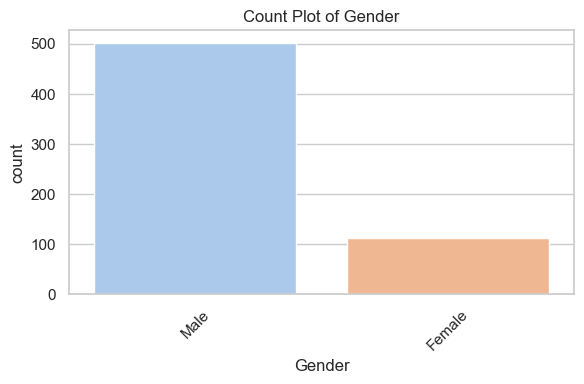

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


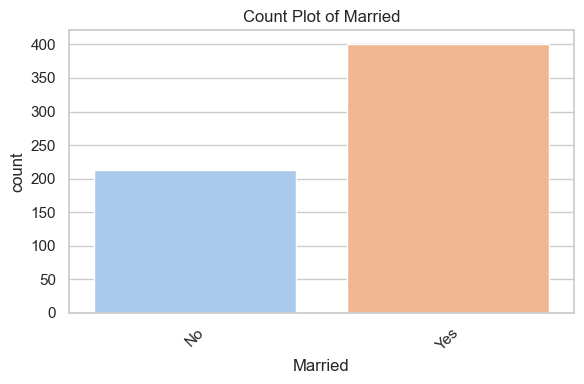

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


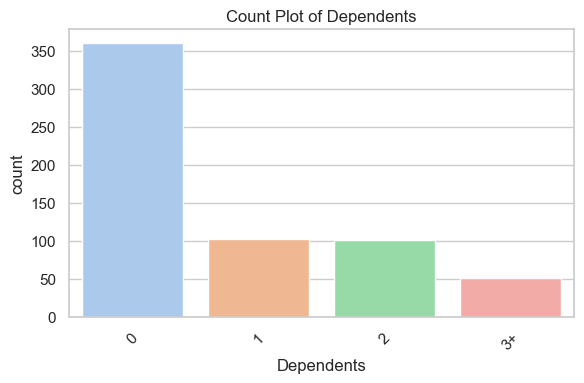

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


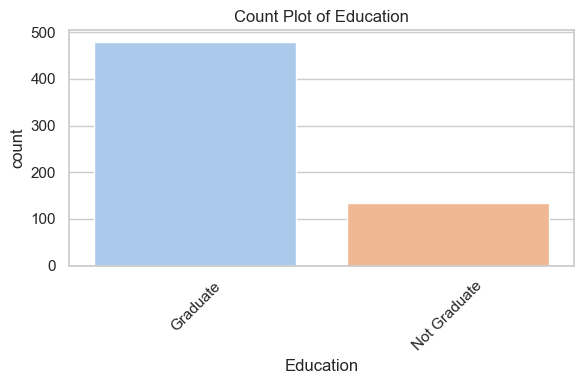

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


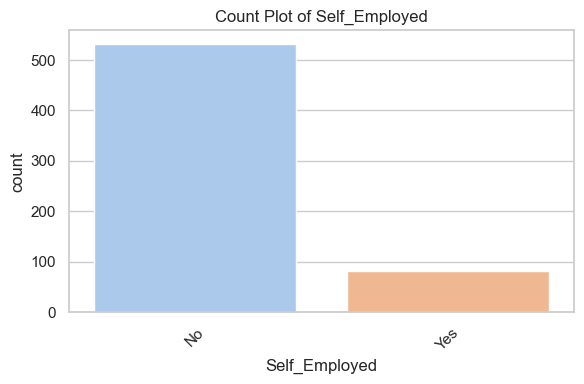

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


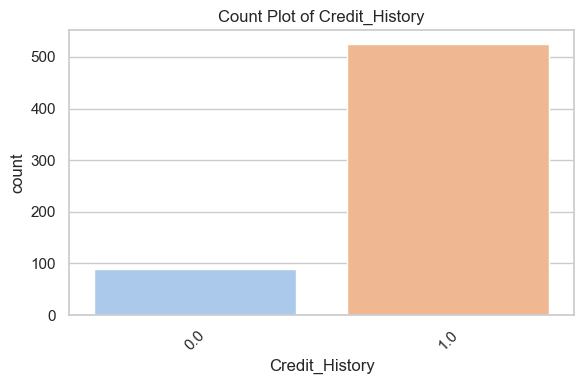

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


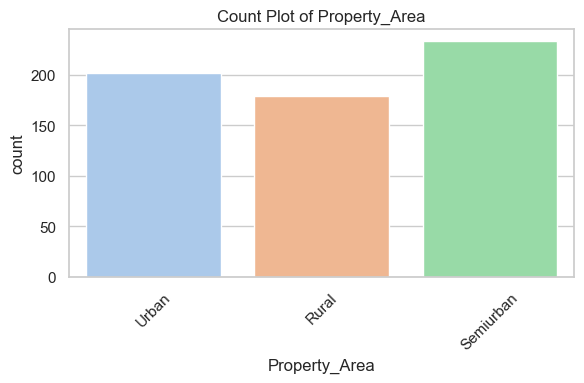

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\2494708544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


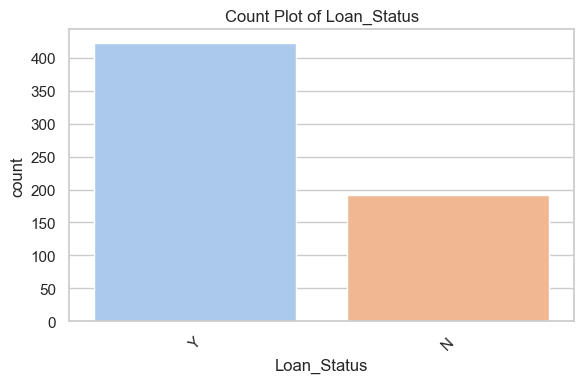

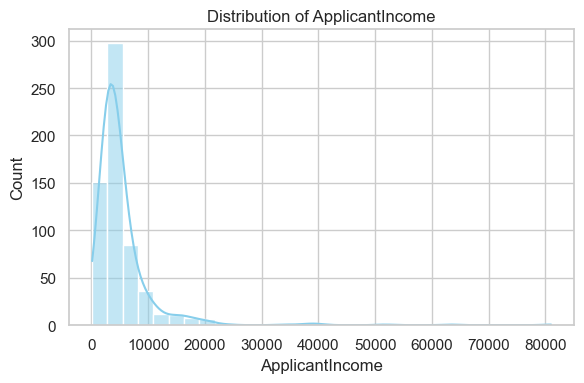

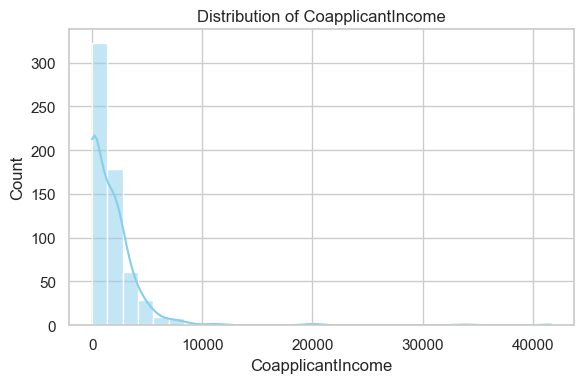

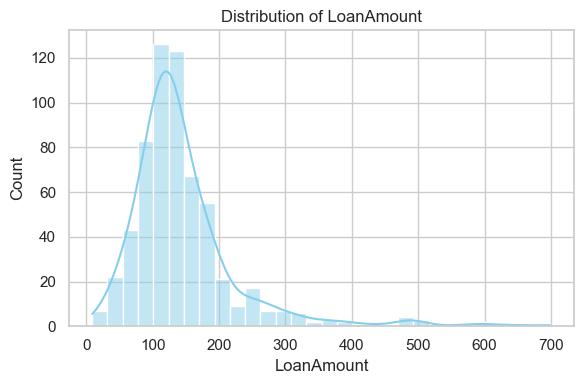

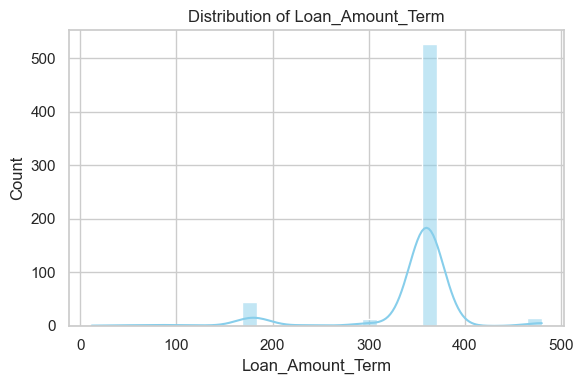

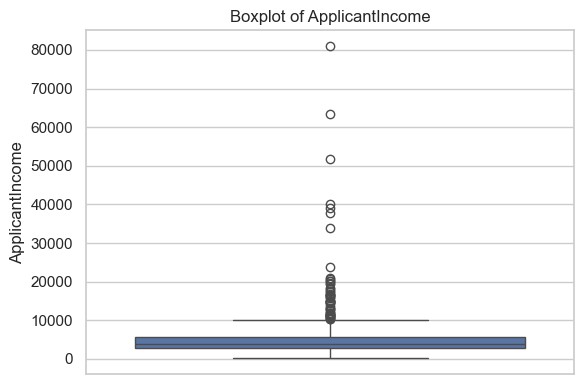

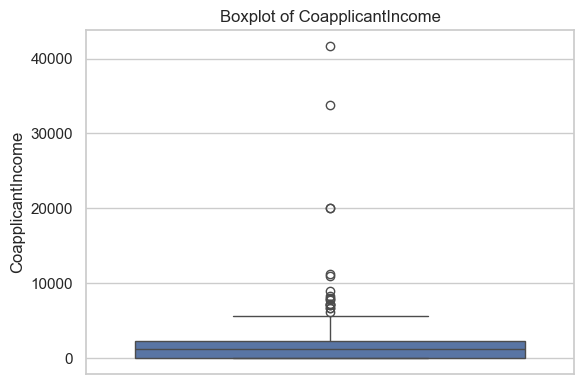

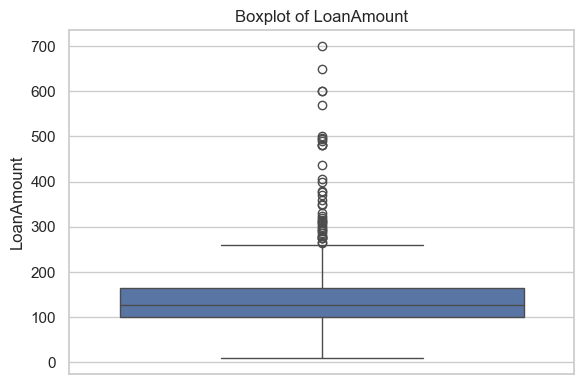

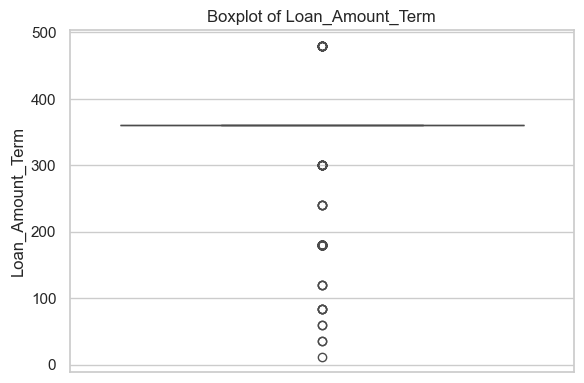

In [21]:
# Set style
sns.set(style='whitegrid')

# Bar plots for categorical features
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Distribution of numerical features
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Boxplots to check outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


## Step 3.5: Bivariate Analysis - Loan_Status vs other features

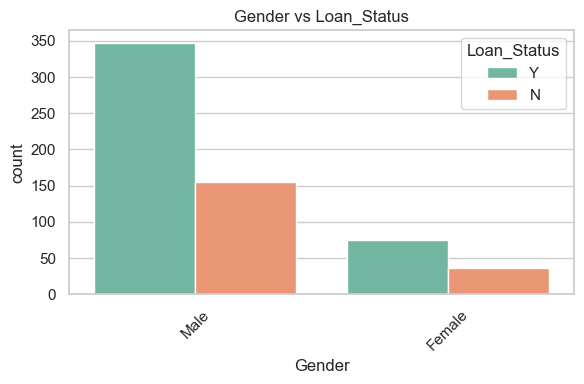

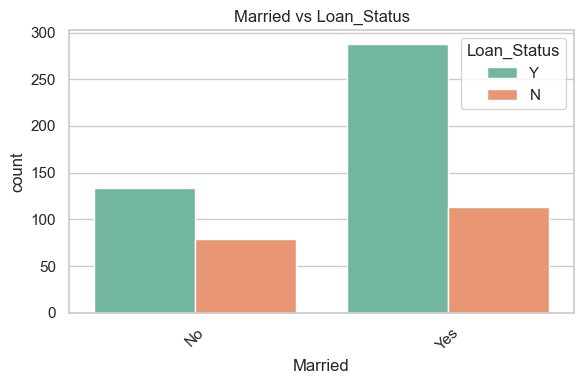

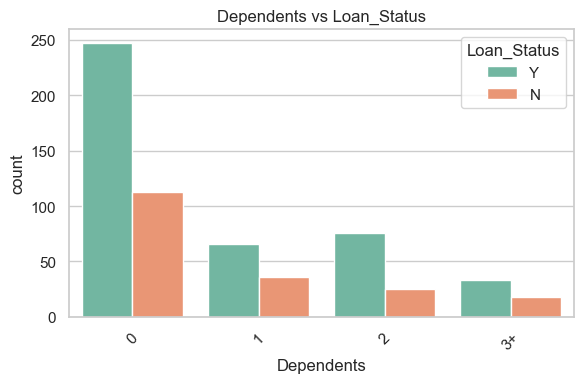

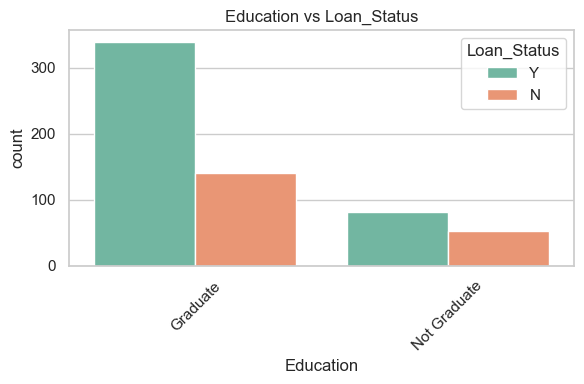

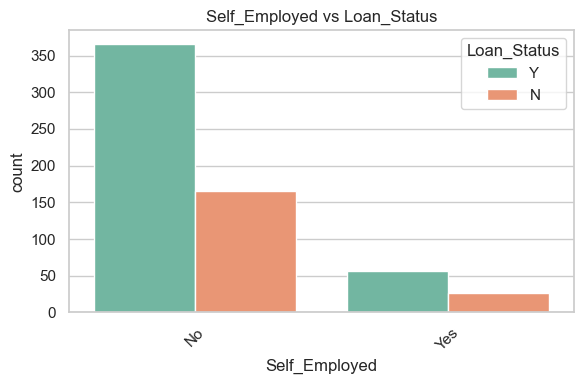

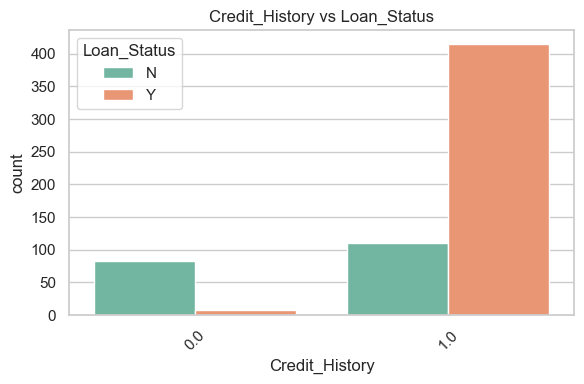

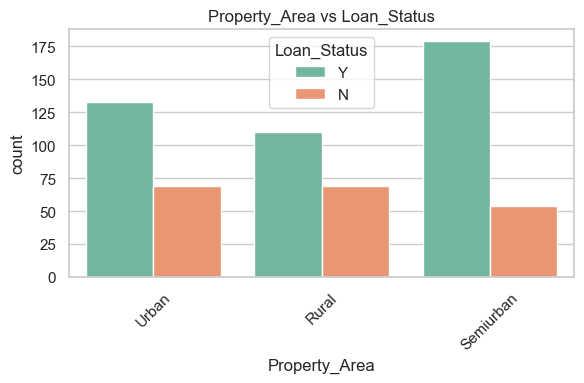

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\421956726.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loan_Status', y=col, palette='Set3')


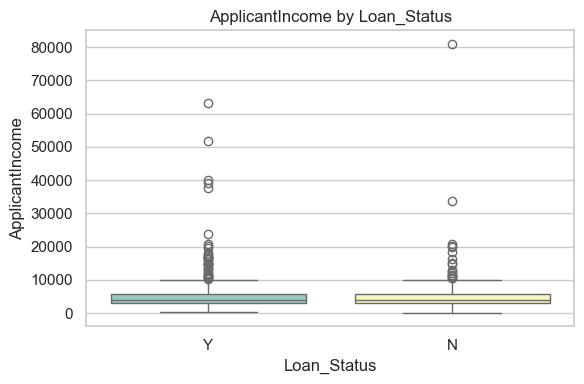

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\421956726.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loan_Status', y=col, palette='Set3')


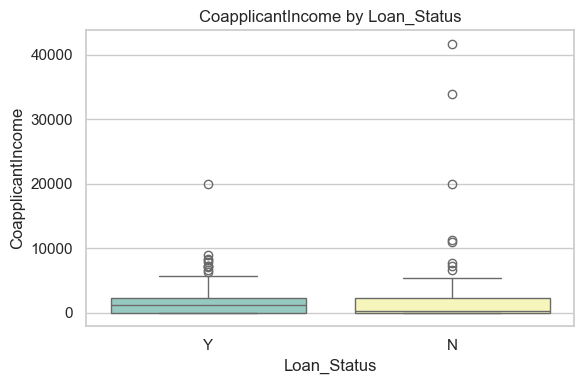

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8796\421956726.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loan_Status', y=col, palette='Set3')


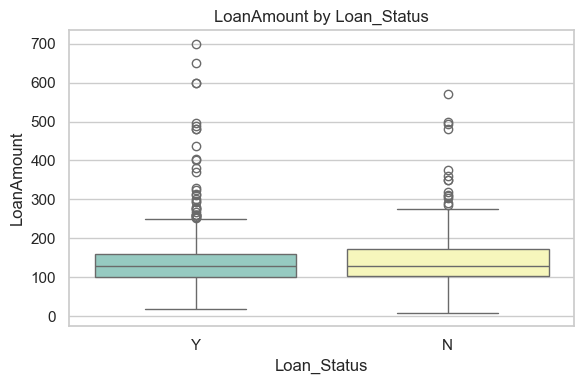

In [22]:
# Categorical Features vs Loan_Status
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Loan_Status', palette='Set2')
    plt.title(f'{col} vs Loan_Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Numerical Features vs Loan_Status (Box plots)
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Loan_Status', y=col, palette='Set3')
    plt.title(f'{col} by Loan_Status')
    plt.tight_layout()
    plt.show()


## Step 4: Feature Engineering

In [23]:
#create a new feature : Total_Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [24]:
# log-Transform skewed features: LoanAmount and Total_Income are likely right-skewed
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])
df['Total_Income_log'] = np.log1p(df['Total_Income'])


In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_log,Total_Income_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,4.859812,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.859812,8.714732
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.795791,8.505525
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.955827,8.699681


In [26]:
# Drop unnecessary columns
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income'], axis=1, inplace=True)


In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.859812,8.674197
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4.859812,8.714732
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4.795791,8.505525
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.955827,8.699681


In [28]:
# encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary features
le = LabelEncoder()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot Encoding for multi-class features
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)


In [29]:
df.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Total_Income_log,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,360.0,1.0,1,4.859812,8.674197,False,False,False,False,True
1,1,1,0,0,360.0,1.0,0,4.859812,8.714732,True,False,False,False,False
2,1,1,0,1,360.0,1.0,1,4.204693,8.006701,False,False,False,False,True
3,1,1,1,0,360.0,1.0,1,4.795791,8.505525,False,False,False,False,True
4,1,0,0,0,360.0,1.0,1,4.955827,8.699681,False,False,False,False,True


In [30]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [31]:
df.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Total_Income_log,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,360.0,1.0,1,4.859812,8.674197,0,0,0,0,1
1,1,1,0,0,360.0,1.0,0,4.859812,8.714732,1,0,0,0,0
2,1,1,0,1,360.0,1.0,1,4.204693,8.006701,0,0,0,0,1
3,1,1,1,0,360.0,1.0,1,4.795791,8.505525,0,0,0,0,1
4,1,0,0,0,360.0,1.0,1,4.955827,8.699681,0,0,0,0,1


## Step 5.1: Feature Selection

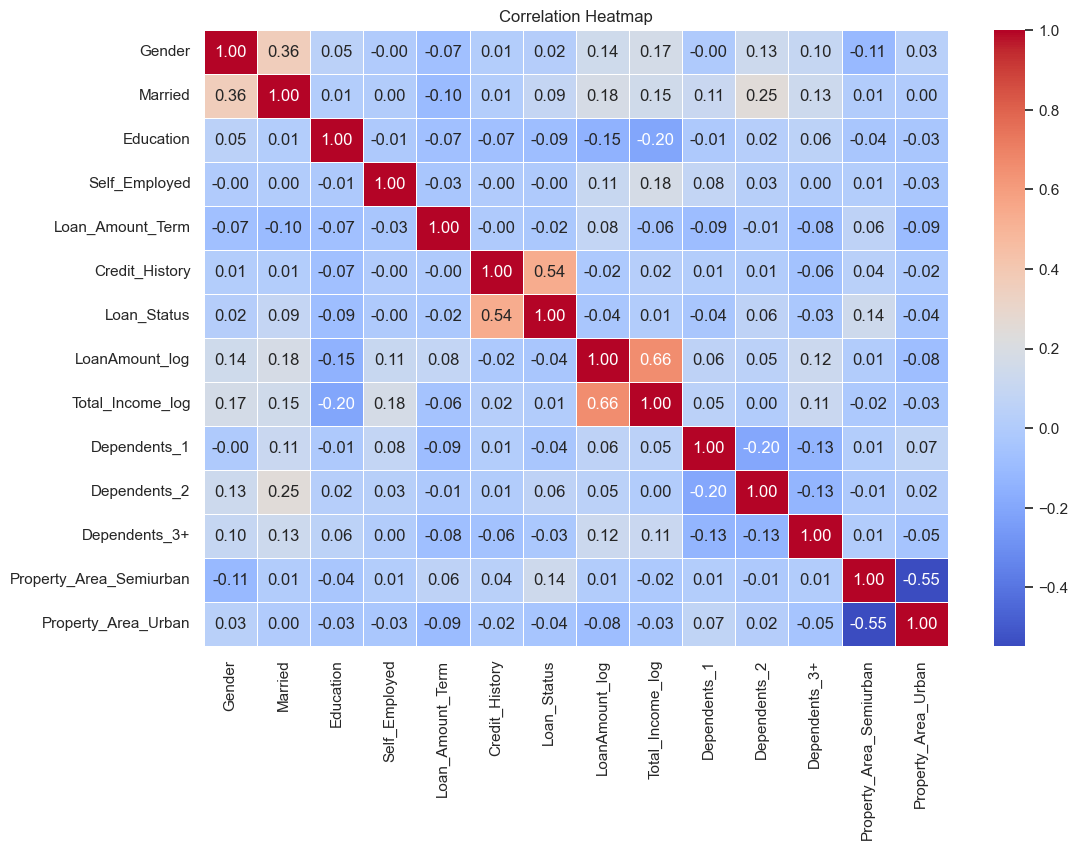

In [32]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# Separate target and features
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [36]:
X.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_Income_log,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,360.0,1.0,4.859812,8.674197,0,0,0,0,1
1,1,1,0,0,360.0,1.0,4.859812,8.714732,1,0,0,0,0
2,1,1,0,1,360.0,1.0,4.204693,8.006701,0,0,0,0,1
3,1,1,1,0,360.0,1.0,4.795791,8.505525,0,0,0,0,1
4,1,0,0,0,360.0,1.0,4.955827,8.699681,0,0,0,0,1


In [37]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

## Step 5.2: Train test split

In [38]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Step 5.3: Build a Base Model - Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


## Step 5.4: Evaluate the Model

In [40]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8536585365853658
Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



## Step 5.5: Multiple models

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=2)
knc = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
mnb = MultinomialNB(alpha=1.0)
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=4, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1', C=1.0, random_state=2)
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=4, random_state=2)
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=2)
bc = BaggingClassifier(n_estimators=100, max_samples=0.8, max_features=0.8, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, max_depth=7, min_samples_split=5, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=2)

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

## Step 5.6: Evaluation of Multiple Models

In [62]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.6910569105691057, 0.6910569105691057)

In [63]:
        accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6910569105691057
Precision -  0.6910569105691057
For  KN
Accuracy -  0.7804878048780488
Precision -  0.79
For  NB
Accuracy -  0.7154471544715447
Precision -  0.7083333333333334
For  DT
Accuracy -  0.8536585365853658
Precision -  0.8526315789473684
For  LR
Accuracy -  0.8536585365853658
Precision -  0.8316831683168316
For  RF
Accuracy -  0.8536585365853658
Precision -  0.8316831683168316


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.8617886178861789
Precision -  0.8617021276595744
For  BgC
Accuracy -  0.8455284552845529
Precision -  0.84375
For  ETC
Accuracy -  0.8455284552845529
Precision -  0.83
For  GBDT
Accuracy -  0.8373983739837398
Precision -  0.8350515463917526
For  xgb
Accuracy -  0.8373983739837398
Precision -  0.8282828282828283


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:59:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [64]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
6,AdaBoost,0.861789,0.861702
3,DT,0.853659,0.852632
7,BgC,0.845528,0.843750
9,GBDT,0.837398,0.835052
4,LR,0.853659,0.831683
5,RF,0.853659,0.831683
8,ETC,0.845528,0.830000
10,xgb,0.837398,0.828283
1,KN,0.780488,0.790000
2,NB,0.715447,0.708333


## Step 5.7: Choosing AdaBoost as my Base Model

### Step 5.7.1: Cross-Validation (CV) of AdaBoost

In [66]:
# Cross-Validation (CV) of AdaBoost
from sklearn.model_selection import cross_val_score

# Evaluate using 5-fold cross-validation
cv_scores = cross_val_score(abc, X, y, cv=5, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

Cross-validation Scores: [0.81300813 0.7804878  0.7804878  0.81300813 0.79508197]
Average CV Accuracy: 0.7964147674263627


### Step 5.7.2: Feature Importance Plot of AdaBoost

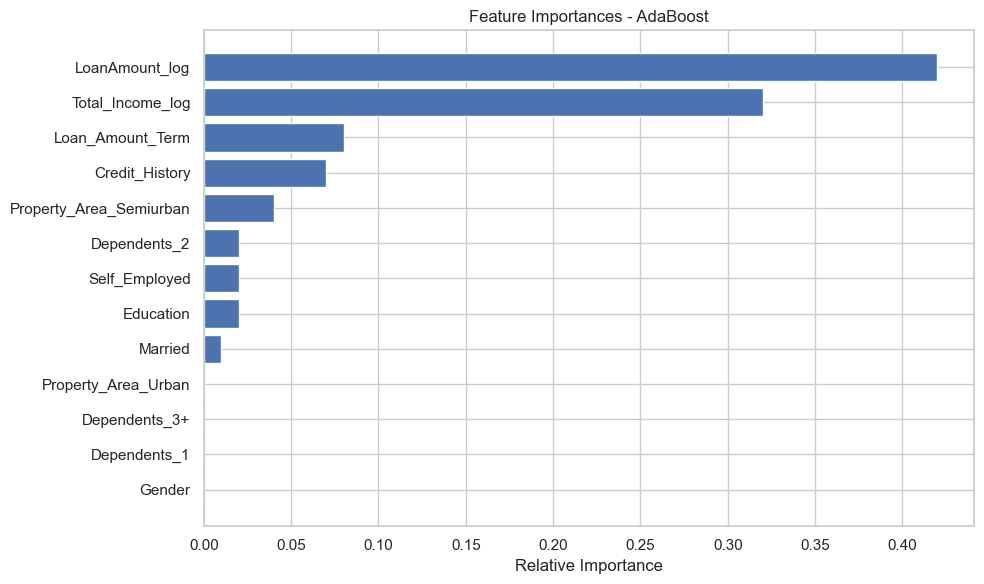

In [67]:
# Feature Importance Plot
feature_importances = abc.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances - AdaBoost')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

### Step 5.7.3: Hyperparameter Tuning of AdaBoost

In [68]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Set parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5]
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=2), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validated accuracy: 0.7964147674263627


## Step 6.1: Train Final Model with Best Parameters

In [69]:
# Train final model with best parameters
from sklearn.ensemble import AdaBoostClassifier

final_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=2)
final_model.fit(X_train, y_train)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=2)

## Step 6.2: Evaluate Final Model

In [71]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

y_pred = final_model.predict(X_test)

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("Final Precision:", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Final Test Accuracy: 0.8617886178861789
Final Precision: 0.8617021276595744
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.86      0.95      0.91        85

    accuracy                           0.86       123
   macro avg       0.86      0.81      0.83       123
weighted avg       0.86      0.86      0.86       123



## Step 6.3: Save the Model

In [72]:
import joblib

# Save the model
joblib.dump(final_model, 'loan_approval_adaboost_model.pkl')


['loan_approval_adaboost_model.pkl']

## Thoughts on Improving the Model in Future Iterations

In [73]:
# 1. TRy Better Ways to Tune the Model
# Right now, we just used basic grid search to tune AdaBoost. Next time, we can try smarter and faster methods 
# like RandomizedSearchCV, or even advanced tools like Optuna to find better settings for the model more efficiently.

# 2. Use Multiple Models Together
# Instead of relying on just one model, we can combine a few different ones (like Logistic Regression, Random Forest,
# and XGBoost). This way, we can take advantage of their strengths and improve overall results using techniques like stacking or voting.

# 3. Fix Any Imbalance in the Data
# If we have a lot more approved loans than rejected ones (or vice versa), it can confuse the model. In future versions,
# we can fix this by using techniques like SMOTE or adjusting class weights so the model treats both classes more fairly.

# 4. Smarter Validation Methods
# Instead of just using simple cross-validation, we can try methods like StratifiedKFold to make sure each fold has a balanced 
# mix of classes. We can also try nested cross-validation to get a more accurate picture of how well the model will work on new data.